<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Lecture_4_Part_2_of_Model_Selection_and_Goodness_of_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import weibull_min,norm,lognorm


# Model Selection and Goodness of Fit
## Part 2 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 04.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
#@title Goodness of fit checks
def residual(y,yfit): 

  e = np.square(y-yfit)
  R = np.sum(e)

  return R

def r2Adj(R,M,y):

  R2 = R**2
  n = len(y)

  return ((n - 1)*R2 - (M - 1))/(n - M)

def AIC(R,M,y):

  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + 2*M

def BIC(R2,M,y):

  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + M*np.log(n)

Normal Guassian Random Variable

Mean:  5.0
Variance:  0.0625




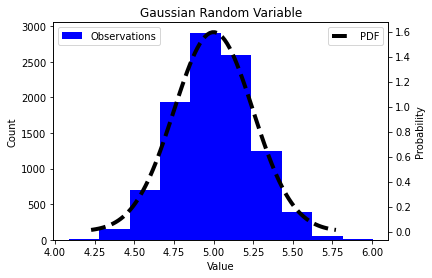

In [ ]:
#@title Underlying distribution
fig, ax = plt.subplots(1, 1)

mu = 5
sig = 0.25

rv = norm(loc=mu,scale=sig)

mean, var, skew, kurt = rv.stats(moments='mvsk')

print("Normal Guassian Random Variable\n")
print("Mean: ",mean)
print("Variance: ",var)
print("\n")

y = rv.rvs(10000,random_state=1)

x = np.linspace(rv.ppf(0.001),
                rv.ppf(0.999), 100)

plt.hist(y,bins=10,color='b')
plt.ylabel("Count")

plt.xlabel("Value")
plt.legend(["Observations"],loc='upper left')

plt2 = plt.twinx()

plt2.plot(x, rv.pdf(x),
            'k--', lw=4)
plt.ylabel("Probability")
plt.legend(["PDF"])
plt.title("Gaussian Random Variable")
plt.show()

We can use scipy's statistics module to fit distributions to a set of data

Note: all of scipy's fitting modules use MLE by defult

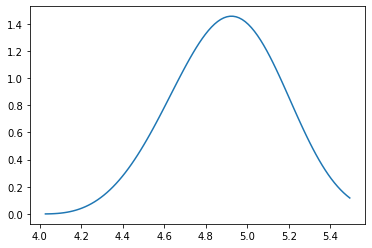

In [ ]:
# fit the data using a weibull distribution

c,locW,scaleW = weibull_min.fit(y,floc=4,fscale=1)

rvW = weibull_min(c,locW,scaleW)

xW = np.linspace(rvW.ppf(0.000001),
                rvW.ppf(0.99), 100)
# plot the pdf

plt.figure(1)
plt.plot(xW,rvW.pdf(xW))
plt.show()



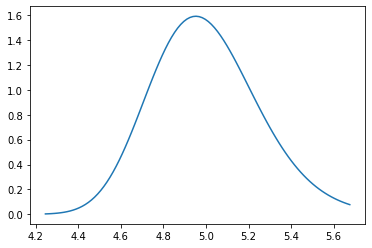

In [ ]:
## now use a lognormal distribution

s,locN,scaleN = lognorm.fit(y,floc=3.1)

rvN = lognorm(s,locN,scaleN)

xN = np.linspace(rvN.ppf(0.0001),
                rvN.ppf(0.99), 100)

plt.figure(1)
plt.plot(xN,rvN.pdf(xN))
plt.show()

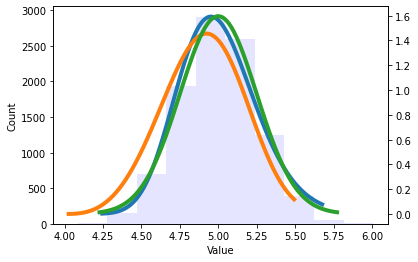

In [ ]:
# Plot all the PDFs against the underlying distribution and histogram

plt.hist(y,bins=10,color='b',alpha=0.1)
plt.ylabel("Count")

plt.xlabel("Value")

plt2 = plt.twinx()
plt2.plot(xN,rvN.pdf(xN),linewidth = 4)
plt.plot(xW,rvW.pdf(xW),linewidth = 4)
plt2.plot(x, rv.pdf(x),lw=4)

plt.show()


Extra Reading https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/


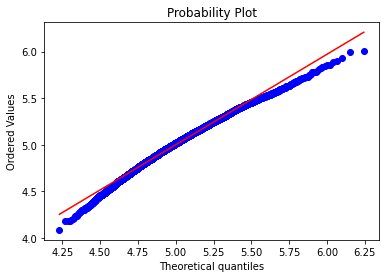

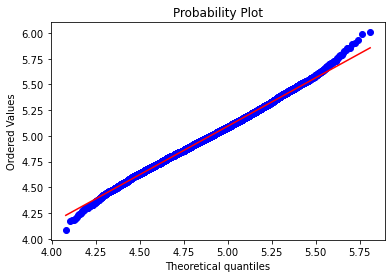

In [ ]:
## plot Q-Q plots of the different distributions using 
## scipys built in module

plt.figure(1)
res1 = stats.probplot(y,dist = lognorm, 
                      sparams = (s,locN,scaleN), plot = plt)

plt.figure(2)
res2 = stats.probplot(y,dist = weibull_min, 
                      sparams = (c,locW,scaleW), plot = plt)


In [ ]:
## use a kstest to test goodness of fit

print(stats.kstest(y, stats.norm(loc=5,scale=0.5).cdf, alternative='less', N=10),'\n')

print(stats.kstest(y, stats.weibull_max(c,locW,scaleW).cdf, alternative='less',N=10),'\n')

print(stats.kstest(y, stats.lognorm(s,locN,scaleN).cdf, alternative='less',N=10),'\n')

KstestResult(statistic=0.16404318012641894, pvalue=6.315966984509524e-236) 

KstestResult(statistic=1.0, pvalue=0.0) 

KstestResult(statistic=0.03021663449686235, pvalue=1.1460597063351114e-08) 



https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array
